# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback
from sklearn.metrics import confusion_matrix, classification_report

# **Load Dataset**

In [2]:
df = pd.read_csv("penyakitumum.csv")
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Allergy,continuous_sneezing,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allergy,continuous_sneezing,shivering,chills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Allergy,continuous_sneezing,shivering,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Allergy,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,prominent_veins_on_calf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Varicose veins,fatigue,cramps,bruising,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     99 non-null     object
 1   Symptom_1   99 non-null     object
 2   Symptom_2   99 non-null     object
 3   Symptom_3   99 non-null     object
 4   Symptom_4   83 non-null     object
 5   Symptom_5   79 non-null     object
 6   Symptom_6   73 non-null     object
 7   Symptom_7   65 non-null     object
 8   Symptom_8   57 non-null     object
 9   Symptom_9   47 non-null     object
 10  Symptom_10  46 non-null     object
 11  Symptom_11  30 non-null     object
 12  Symptom_12  28 non-null     object
 13  Symptom_13  28 non-null     object
 14  Symptom_14  19 non-null     object
 15  Symptom_15  18 non-null     object
 16  Symptom_16  10 non-null     object
dtypes: object(17)
memory usage: 13.3+ KB


In [4]:
# Mengecek Duplikat
df.duplicated().sum()

np.int64(0)

In [5]:
# Mengecek Missing Value
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,16
Symptom_5,20
Symptom_6,26
Symptom_7,34
Symptom_8,42
Symptom_9,52


In [6]:
# Mengisi nilai null dengan none
df.fillna("none", inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Allergy,continuous_sneezing,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
1,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none
2,Allergy,continuous_sneezing,shivering,chills,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Allergy,continuous_sneezing,shivering,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Allergy,shivering,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none


In [7]:
# Mengambil semua gejala unik dari setiap kolom (kecuali kolom pertama) pada df
# lalu menghapus nilai "none" dan mengonversinya menjadi list dan menampilkannya
all_symptoms = set()
for col in df.columns[1:]:
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

[' foul_smell_of urine',
 ' continuous_sneezing',
 ' loss_of_appetite',
 ' bruising',
 ' diarrhoea',
 ' malaise',
 ' vomiting',
 ' high_fever',
 ' chills',
 ' altered_sensorium',
 ' muscle_pain',
 ' pain_behind_the_eyes',
 ' obesity',
 ' mild_fever',
 ' weakness_of_one_body_side',
 ' watering_from_eyes',
 ' back_pain',
 ' continuous_feel_of_urine',
 ' joint_pain',
 ' shivering',
 ' redness_of_eyes',
 ' burning_micturition',
 ' congestion',
 ' skin_rash',
 ' excessive_hunger',
 ' prominent_veins_on_calf',
 ' abdominal_pain',
 ' acidity',
 ' cramps',
 ' nausea',
 ' constipation',
 ' chest_pain',
 ' family_history',
 ' blurred_and_distorted_vision',
 ' irritability',
 ' throat_irritation',
 ' headache',
 ' runny_nose',
 ' toxic_look_(typhos)',
 ' fatigue',
 ' sweating',
 ' blood_in_sputum',
 ' rusty_sputum',
 ' loss_of_smell',
 ' bladder_discomfort',
 ' sinus_pressure',
 ' depression',
 ' stiff_neck',
 ' fast_heart_rate',
 ' swollen_blood_vessels',
 ' phlegm',
 ' weight_loss',
 ' red_spot

In [8]:
# Membersihkan spasi pada awal kalimat gejala pada DataFrame
# lalu mengumpulkan semua gejala unik (kecuali 'none') dari semua kolom kecuali kolom pertama dan menampilkannya
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_symptoms = set()
for col in df.columns[1:]:
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

<ipython-input-8-2cdcae58202a>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


['yellowing_of_eyes',
 'swollen_legs',
 'pain_behind_the_eyes',
 'blood_in_sputum',
 'continuous_sneezing',
 'loss_of_smell',
 'burning_micturition',
 'swelled_lymph_nodes',
 'breathlessness',
 'phlegm',
 'vomiting',
 'high_fever',
 'weakness_of_one_body_side',
 'stiff_neck',
 'shivering',
 'fatigue',
 'constipation',
 'foul_smell_of urine',
 'cough',
 'bruising',
 'nausea',
 'chest_pain',
 'muscle_pain',
 'irritability',
 'loss_of_appetite',
 'back_pain',
 'continuous_feel_of_urine',
 'swollen_blood_vessels',
 'obesity',
 'malaise',
 'headache',
 'mucoid_sputum',
 'sinus_pressure',
 'sweating',
 'watering_from_eyes',
 'visual_disturbances',
 'blurred_and_distorted_vision',
 'throat_irritation',
 'rusty_sputum',
 'abdominal_pain',
 'redness_of_eyes',
 'diarrhoea',
 'indigestion',
 'family_history',
 'toxic_look_(typhos)',
 'fast_heart_rate',
 'congestion',
 'weight_loss',
 'depression',
 'cramps',
 'runny_nose',
 'excessive_hunger',
 'red_spots_over_body',
 'skin_rash',
 'belly_pain',


In [9]:
# Mengurutkan gejala sesuai dengan abjad
all_symptoms = sorted(all_symptoms)
all_symptoms

['abdominal_pain',
 'acidity',
 'altered_sensorium',
 'back_pain',
 'belly_pain',
 'bladder_discomfort',
 'blood_in_sputum',
 'blurred_and_distorted_vision',
 'breathlessness',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'depression',
 'diarrhoea',
 'excessive_hunger',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'indigestion',
 'irritability',
 'joint_pain',
 'loss_of_appetite',
 'loss_of_smell',
 'malaise',
 'mild_fever',
 'mucoid_sputum',
 'muscle_pain',
 'nausea',
 'obesity',
 'pain_behind_the_eyes',
 'phlegm',
 'prominent_veins_on_calf',
 'red_spots_over_body',
 'redness_of_eyes',
 'runny_nose',
 'rusty_sputum',
 'shivering',
 'sinus_pressure',
 'skin_rash',
 'stiff_neck',
 'sweating',
 'swelled_lymph_nodes',
 'swollen_blood_vessels',
 'swollen_legs',
 'throat_irritation',
 'toxic_look_(typhos)',
 '

In [10]:
# Menampilkan jumlah gejala
jumlah_symptoms = len(all_symptoms)
print(f"Jumlah gejala unik: {jumlah_symptoms}")

Jumlah gejala unik: 62


In [11]:
# Fungsi untuk menambah data pelatihan dengan membuat sampel gejala acak berdasarkan penyakit
def augment_data(df, num_augmented_samples=100):
    augmented_data = []
    diseases = df["Disease"].unique()  # Mengambil semua jenis penyakit yang unik
    for disease in diseases:
        disease_rows = df[df["Disease"] == disease]  # Memfilter data berdasarkan penyakit
        disease_symptoms = set()
        for _, row in disease_rows.iterrows():
            for col in df.columns[1:]:  # Melewati kolom "Disease"
                if row[col] != "none":
                    disease_symptoms.add(row[col])  # Mengumpulkan gejala yang bukan "none"
        disease_symptoms = list(disease_symptoms - {"none"})
        for _ in range(num_augmented_samples):
            num_symptoms = random.randint(1, min(len(disease_symptoms), 16))  # Menentukan jumlah gejala yang dipilih secara acak (maksimal 16)
            selected_symptoms = random.sample(disease_symptoms, num_symptoms)  # Memilih gejala secara acak
            new_row = {"Disease": disease}
            for i in range(1, 17):  # Menginisialisasi semua kolom Symptom_1 sampai Symptom_16 dengan "none"
                new_row[f"Symptom_{i}"] = "none"
            for i, symptom in enumerate(selected_symptoms, 1):  # Memasukkan gejala ke dalam kolom Symptom_1 sampai Symptom_16
                if i <= 16:
                    new_row[f"Symptom_{i}"] = symptom
            augmented_data.append(new_row)  # Menambahkan baris baru ke daftar data augmentasi
    return pd.DataFrame(augmented_data)

# Menambahkan data augmentasi ke data asli dan isi nilai kosong dengan "none"
df_augmented = augment_data(df, num_augmented_samples=100)
df_combined = pd.concat([df, df_augmented], ignore_index=True)
df_combined.fillna("none", inplace=True)

In [12]:
df_combined

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Allergy,continuous_sneezing,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
1,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none
2,Allergy,continuous_sneezing,shivering,chills,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Allergy,continuous_sneezing,shivering,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Allergy,shivering,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Varicose veins,swollen_legs,obesity,cramps,bruising,swollen_blood_vessels,fatigue,prominent_veins_on_calf,none,none,none,none,none,none,none,none,none
1395,Varicose veins,cramps,obesity,none,none,none,none,none,none,none,none,none,none,none,none,none,none
1396,Varicose veins,swollen_blood_vessels,fatigue,obesity,cramps,none,none,none,none,none,none,none,none,none,none,none,none
1397,Varicose veins,cramps,prominent_veins_on_calf,swollen_blood_vessels,bruising,swollen_legs,obesity,fatigue,none,none,none,none,none,none,none,none,none


In [13]:
# Fungsi untuk mengubah gejala di setiap baris menjadi vektor biner berdasarkan daftar gejala unik
def symptoms_to_vector(row):
    symptom_vector = [0] * len(all_symptoms)
    for col in df.columns[1:]:
        symptom = row[col]
        if symptom != "none" and symptom in all_symptoms:
            symptom_vector[all_symptoms.index(symptom)] = 1
    return symptom_vector

# Menerapkan fungsi ke seluruh baris data gabungan untuk membuat DataFrame vektor gejala
symptom_vectors = df_combined.apply(symptoms_to_vector, axis=1, result_type="expand")
symptom_vectors.columns = all_symptoms

In [14]:
# Encode label
le = LabelEncoder()
df_combined["Disease"] = le.fit_transform(df_combined["Disease"])
df_encoded = pd.concat([df_combined["Disease"], symptom_vectors], axis=1)

In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Disease                       1399 non-null   int64
 1   abdominal_pain                1399 non-null   int64
 2   acidity                       1399 non-null   int64
 3   altered_sensorium             1399 non-null   int64
 4   back_pain                     1399 non-null   int64
 5   belly_pain                    1399 non-null   int64
 6   bladder_discomfort            1399 non-null   int64
 7   blood_in_sputum               1399 non-null   int64
 8   blurred_and_distorted_vision  1399 non-null   int64
 9   breathlessness                1399 non-null   int64
 10  bruising                      1399 non-null   int64
 11  burning_micturition           1399 non-null   int64
 12  chest_pain                    1399 non-null   int64
 13  chills                        139

In [16]:
df_encoded.head()

,Disease,abdominal_pain,acidity,altered_sensorium,back_pain,belly_pain,bladder_discomfort,blood_in_sputum,blurred_and_distorted_vision,breathlessness,...,swollen_blood_vessels,swollen_legs,throat_irritation,toxic_look_(typhos),visual_disturbances,vomiting,watering_from_eyes,weakness_of_one_body_side,weight_loss,yellowing_of_eyes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# Split data
X = df_encoded.drop("Disease", axis=1)
y = df_encoded["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Mendefinisikan model
model = Sequential([
    Dense(128, activation="relu", input_shape=(len(all_symptoms),)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(len(le.classes_), activation="softmax")
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,829 (73.55 KB)

 Trainable params: 18,829 (73.55 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Callback untuk menghentikan jika akurasi dan val_akurasi > 95%
class EarlyStopAt95(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
                print("\nAccuracy dan Val Accuracy > 95%, menghentikan pelatihan.")
                self.model.stop_training = True

early_stop_at_95 = EarlyStopAt95()

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[reduce_lr,early_stopping, early_stop_at_95],
                    verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.1168 - loss: 2.5359 - val_accuracy: 0.3214 - val_loss: 2.3500 - learning_rate: 0.0010
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2162 - loss: 2.3097 - val_accuracy: 0.5536 - val_loss: 1.9481 - learning_rate: 0.0010
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3706 - loss: 1.9650 - val_accuracy: 0.8348 - val_loss: 1.4256 - learning_rate: 0.0010
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5593 - loss: 1.5530 - val_accuracy: 0.8929 - val_loss: 0.9085 - learning_rate: 0.0010
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 1.1187 - val_accuracy: 0.9375 - val_loss: 0.5564 - learning_rate: 0.0010
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8207 - loss: 0.7796 - val_accuracy: 0.9464 - val_loss: 0.3720 - learning_rate: 0.0010
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8245 - loss: 0.6749 - val_accura

In [20]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9393 - loss: 0.2059  
Test Loss: 0.1764838546514511
Test Accuracy: 0.949999988079071


In [21]:
# Prediksi pada data uji dan laporan klasifikasi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report:
                              precision    recall  f1-score   support

                     Allergy       1.00      1.00      1.00        21
            Bronchial Asthma       0.88      1.00      0.93        21
                 Common Cold       1.00      0.91      0.95        22
                      Dengue       0.96      1.00      0.98        22
                Heart attack       0.95      0.95      0.95        21
                     Malaria       0.86      0.90      0.88        21
                    Migraine       1.00      1.00      1.00        22
Paralysis (brain hemorrhage)       0.84      1.00      0.91        21
                   Pneumonia       0.90      0.86      0.88        22
                Tuberculosis       1.00      0.86      0.93        22
                     Typhoid       1.00      0.86      0.93        22
     Urinary tract infection       1.00      1.00      1.00        21
              Varicose vein

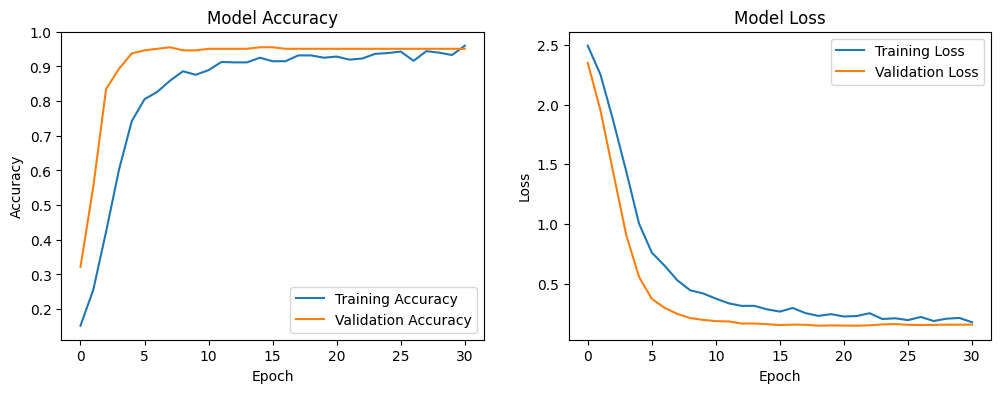

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [29]:
def predict_disease(symptoms_list):
    # Membuat vektor gejala untuk input
    input_vector = [0] * len(all_symptoms)
    valid_symptoms_found = False
    for symptom in symptoms_list:
        if symptom in all_symptoms:
            input_vector[all_symptoms.index(symptom)] = 1
            valid_symptoms_found = True

    if not valid_symptoms_found:
        print("Tidak ada gejala yang valid ditemukan dalam daftar input.")
        return None, None

    # Mengubah ke format yang sesuai untuk model (numpy array dan reshape)
    input_array = np.array([input_vector])

    # Melakukan prediksi
    prediction = model.predict(input_array)

    # Mendapatkan indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(prediction)

    # Mendapatkan nama penyakit dari LabelEncoder
    predicted_disease = le.inverse_transform([predicted_class_index])[0]

    return predicted_disease

# input dari user
user_input = input("Masukkan gejala (pisahkan dengan koma): ")
symptoms_to_predict = [sym.strip() for sym in user_input.split(",")]

predicted_disease = predict_disease(symptoms_to_predict)

if predicted_disease:
    print(f"Penyakit yang diprediksi: {predicted_disease}")


Masukkan gejala (pisahkan dengan koma): cough, high_fever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Penyakit yang diprediksi: Bronchial Asthma


In [24]:
import joblib
# Save symptoms to JSON file
with open('general_symptoms.json', 'w') as f:
    json.dump(all_symptoms, f, indent=4)
print("Symptoms saved to general_symptoms.json")

# Save model
model.save("general_disease_model.h5")
print("Model saved to general_disease_model.h5")

# Save LabelEncoder
joblib.dump(le, "general_label_encoder.pkl")
print("LabelEncoder saved to general_label_encoder.pkl")

Symptoms saved to general_symptoms.json
Model saved to general_disease_model.h5
LabelEncoder saved to general_label_encoder.pkl
